In [1]:
import Zip
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import math
import pickle

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

In [2]:
with open('NG_data.p', 'rb') as fp:
    NG_info = pickle.load(fp)

In [3]:
print(NG_info[300])

{'event': 460, 's1': 48618.0, 's2': 213835.0, 's1_position': 100055, 's2_position': 139300}


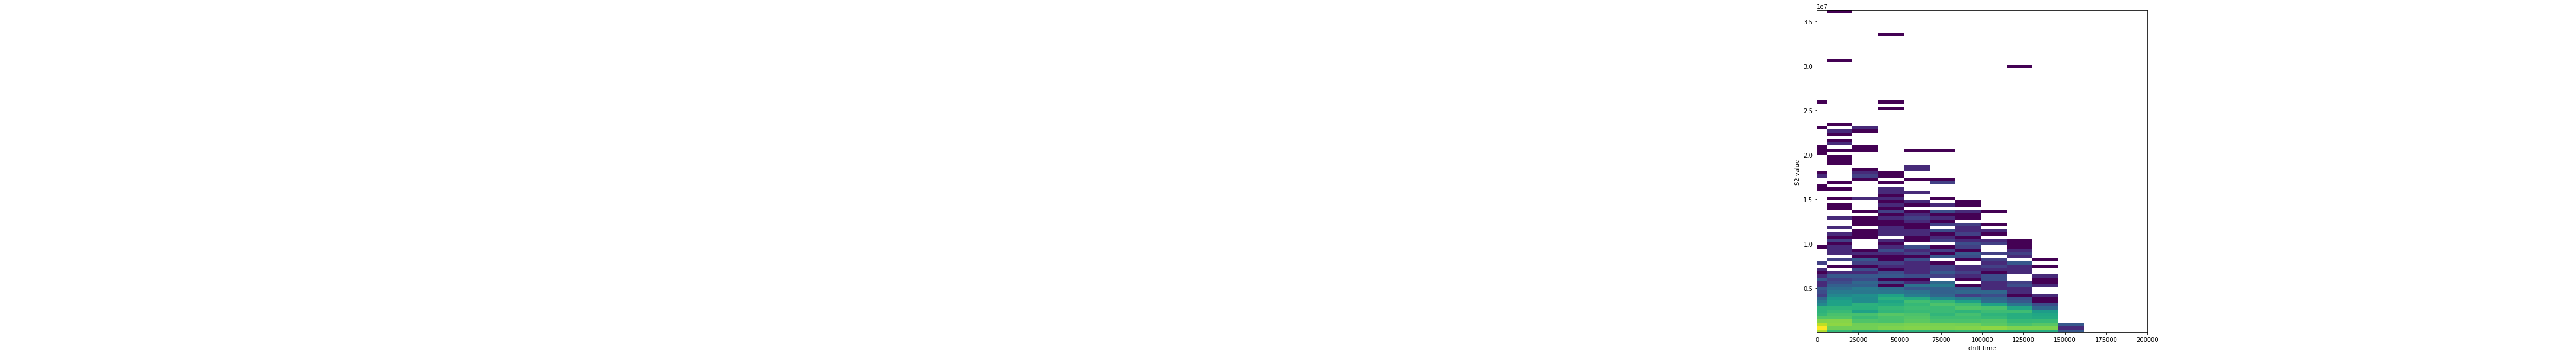

In [11]:
# Drift time
#%matplotlib inline
s1 = []
s2 = []
drift = []
for info in NG_info:
    drift.append(2*(info['s2_position']-info['s1_position']))
    s1.append(info['s1'])
    s2.append(info['s2'])
fig2, ax2 = plt.subplots(figsize = (10.,10.))
ax2.hist2d(drift, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax2.set_xlabel("drift time")
ax2.set_ylabel('S2 value')
ax2.set_xlim(0., 200000)
fig2.savefig('NG_drift_try.png', dpi = 300)
plt.show()

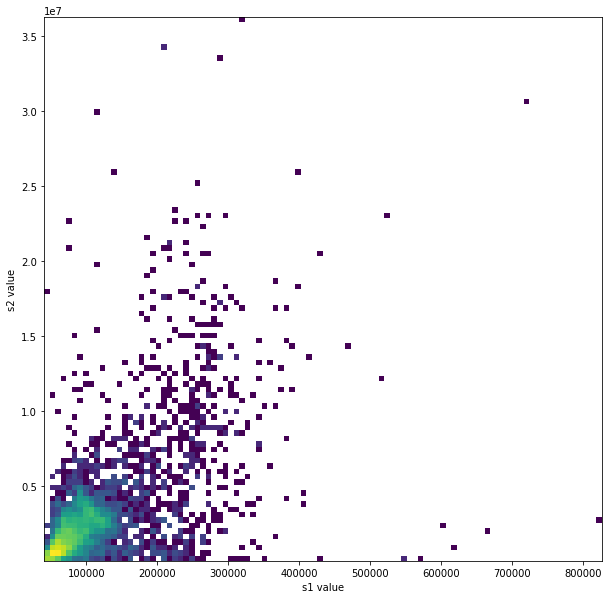

In [12]:
fig3, ax3 = plt.subplots(figsize = (10.,10.))
ax3.hist2d(s1, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax3.set_xlabel('s1 value')
ax3.set_ylabel('s2 value')
#ax3.set_xlim(0., 200000)
fig3.savefig('NG_s1s2_try.png', dpi = 300)

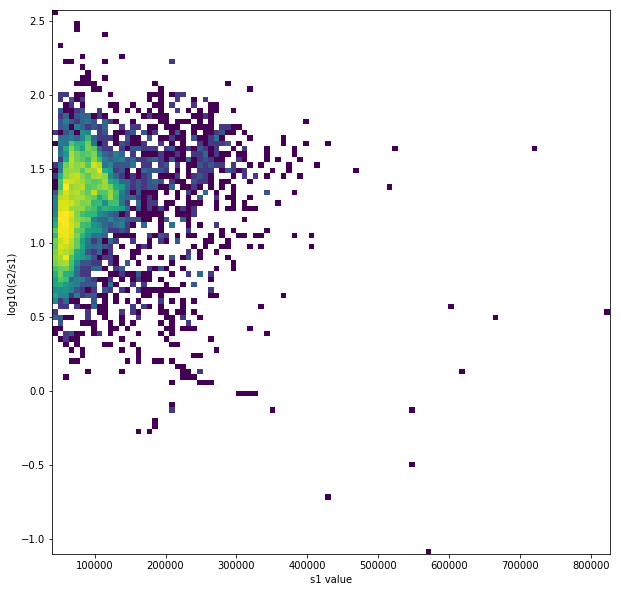

In [13]:
fig5, ax5 = plt.subplots(figsize = (10.,10.))
ax5.hist2d(s1, np.log10(np.asarray(s2)/np.asarray(s1)), bins=(100,100), norm=mpl.colors.LogNorm())
ax5.set_xlabel('s1 value')
ax5.set_ylabel('log10(s2/s1)')
#ax4.set_xlim(0., 200000)
#ax4.set_ylim(0., 1e7)
fig5.savefig('NG_s2overs1.png', dpi = 300)
plt.show()

In [14]:
with open('Rn220_data.p', 'rb') as fp2:
    Rn220_info = pickle.load(fp2)
print(Rn220_info[200])

{'event': 343, 's1': 58677.0, 's2': 361574.0, 's1_position': 100053, 's2_position': 169954}


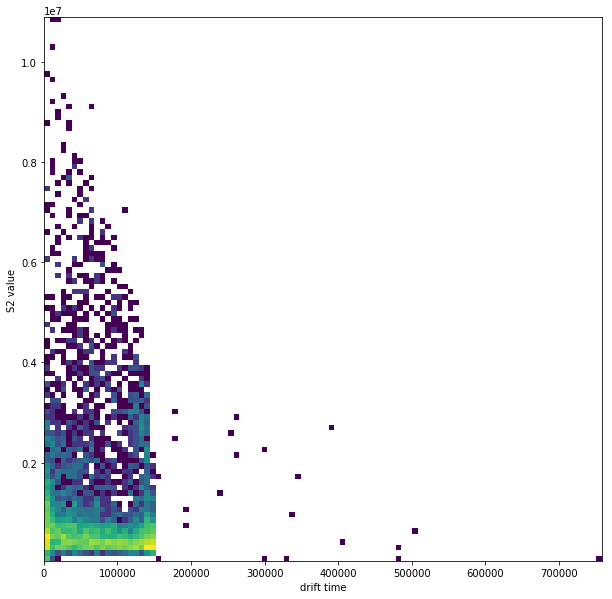

In [18]:
# Drift time
#%matplotlib inline
s12 = []
s22 = []
drift2 = []
for info in Rn220_info:
    if info['s2_position']>info['s1_position']:
        drift2.append(2*(info['s2_position']-info['s1_position']))
        s12.append(info['s1'])
        s22.append(info['s2'])
fig2, ax2 = plt.subplots(figsize = (10.,10.))
ax2.hist2d(drift2, s22, bins=(100,100), norm=mpl.colors.LogNorm())
ax2.set_xlabel("drift time")
ax2.set_ylabel('S2 value')
#ax2.set_xlim(0., 200000)
fig2.savefig('Rn220_drift_try.png', dpi = 300)
plt.show()

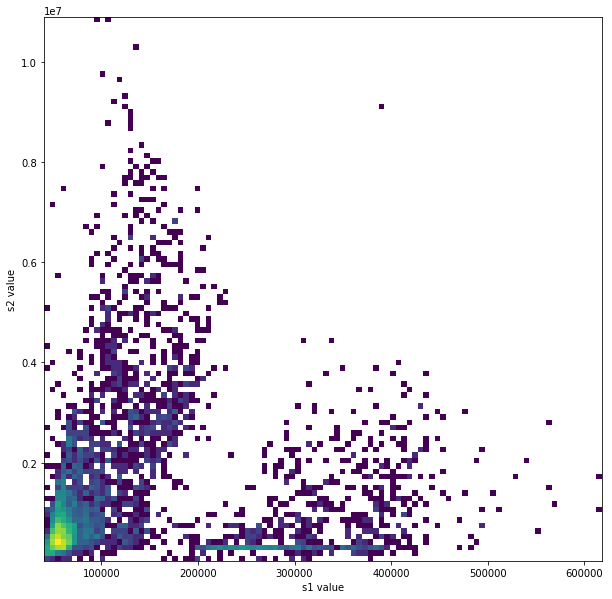

In [19]:
fig3, ax3 = plt.subplots(figsize = (10.,10.))
ax3.hist2d(s12, s22, bins=(100,100), norm=mpl.colors.LogNorm())
ax3.set_xlabel('s1 value')
ax3.set_ylabel('s2 value')
#ax3.set_xlim(0., 200000)
fig3.savefig('Rn220_s1s2_try.png', dpi = 300)